## SalesForecasting



## Imports

In [1]:
!pip install prophet


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet  # Facebook Prophet for forecasting

%matplotlib inline


## Load & Prepare Data

In [6]:
# Load dataset
data = pd.read_csv("../data/OnlineRetailDataSet.csv", encoding="utf-8-sig", parse_dates=["InvoiceDate"])

# Ensure datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Compute daily sales
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()

# Prophet requires columns named ds (date) and y (value)
daily_sales = daily_sales.rename(columns={'InvoiceDate':'ds', 'TotalPrice':'y'})
daily_sales.head()


,ds,y
0,2010-01-12,58635.56
1,2010-02-12,46207.28
2,2010-03-12,45620.46
3,2010-05-12,31383.95
4,2010-06-12,53860.18


## Plot Daily Sales

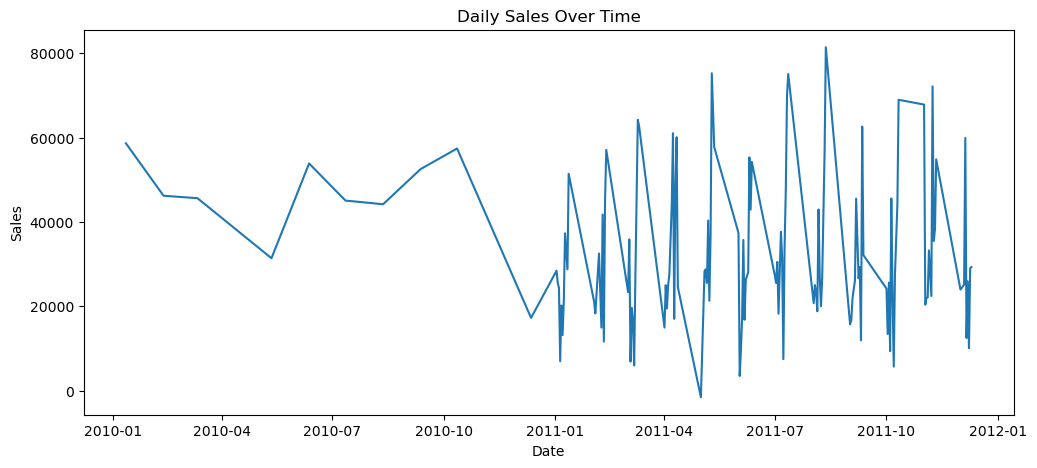

In [7]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['ds'], daily_sales['y'])
plt.title("Daily Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.savefig("../visuals/daily_sales.png", dpi=150)
plt.show()


## Train Prophet Model

In [8]:
model = Prophet()
model.fit(daily_sales)


02:00:49 - cmdstanpy - INFO - Chain [1] start processing
02:00:49 - cmdstanpy - INFO - Chain [1] done processing


## Forecast Future Sales

In [13]:
# Forecast for next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
212,2012-03-05,29149.409646,6298.550269,52502.832979
213,2012-03-06,36815.976134,14541.671967,57973.698450
214,2012-03-07,26530.770655,4371.030530,51631.184095
215,2012-03-08,26307.751264,4280.315386,49178.356262
216,2012-03-09,28652.229372,4985.900967,51033.993486


## Plot Forecast Results

In [19]:
%matplotlib notebook


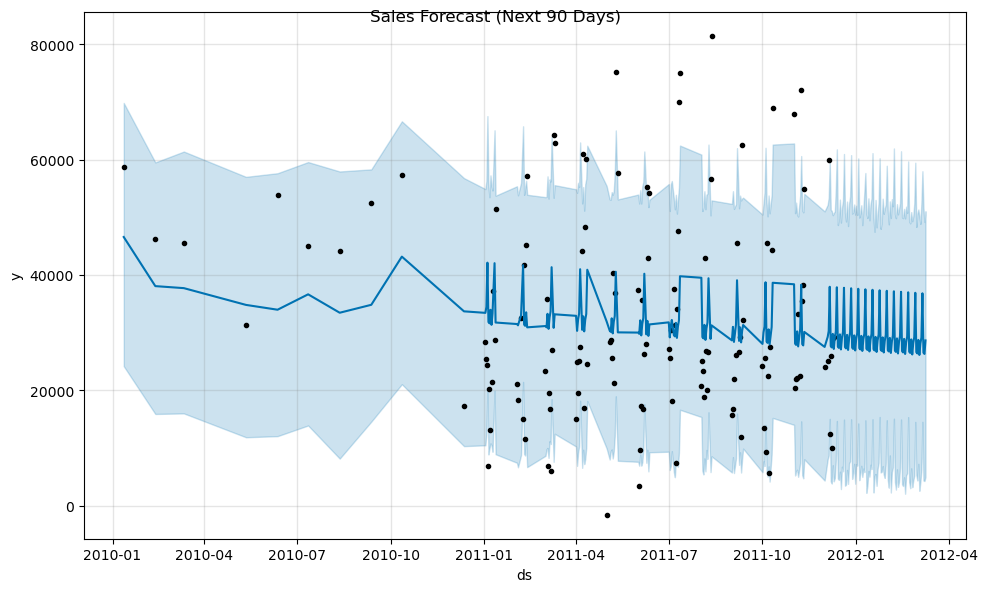

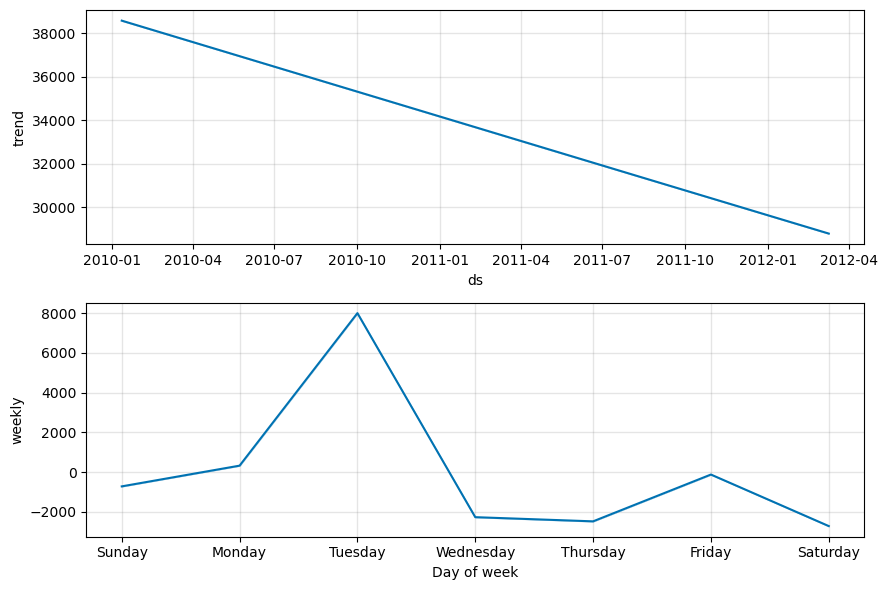

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# Forecast plot
fig1 = model.plot(forecast)
fig1.suptitle("Sales Forecast (Next 90 Days)")
plt.show()  # display
fig1.savefig("../visuals/sales_forecast.png", dpi=150)
plt.close(fig1)

# Components plot
fig2 = model.plot_components(forecast)
plt.show()
fig2.savefig("../visuals/sales_forecast_components.png", dpi=150)
plt.close(fig2)
